# 2. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "C:\DL\FastCampus\DataAnalysis\CSV\data_2021.csv"
data = pd.read_csv(file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154110 entries, 0 to 154109
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     154110 non-null  int64
 1   집계시      154110 non-null  int64
 2   출발영업소코드  154110 non-null  int64
 3   도착영업소코드  154110 non-null  int64
 4   통행시간     154110 non-null  int64
 5   요일       154110 non-null  int64
dtypes: int64(6)
memory usage: 7.1 MB


# 3. 집계시

In [3]:
data_06_22 = data[data.집계시.isin(range(6,23))]
data_06_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115832 entries, 0 to 154109
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     115832 non-null  int64
 1   집계시      115832 non-null  int64
 2   출발영업소코드  115832 non-null  int64
 3   도착영업소코드  115832 non-null  int64
 4   통행시간     115832 non-null  int64
 5   요일       115832 non-null  int64
dtypes: int64(6)
memory usage: 6.2 MB


In [4]:
data_06_22.sort_values(by="집계시")

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
84170,20210721,6,101,140,15381,2
38628,20210406,6,101,105,720,1
56035,20210512,6,101,105,804,2
56036,20210512,6,101,105,688,2
38627,20210406,6,101,105,892,1
...,...,...,...,...,...,...
96627,20210819,22,101,120,8836,3
148322,20211218,22,101,115,5955,5
148321,20211218,22,101,115,4662,5
11015,20210128,22,101,115,5424,3


In [5]:
data_06_22_count = data_06_22["집계시"].value_counts()

In [6]:
data_06_22_count

9     7116
10    7113
11    7101
12    7098
13    7089
14    7087
15    7012
16    6987
8     6978
17    6903
18    6776
7     6763
19    6659
20    6509
6     6392
21    6255
22    5994
Name: 집계시, dtype: int64

In [7]:
data_06_22_count_sort = data_06_22_count.sort_index()
print(data_06_22_count_sort)

6     6392
7     6763
8     6978
9     7116
10    7113
11    7101
12    7098
13    7089
14    7087
15    7012
16    6987
17    6903
18    6776
19    6659
20    6509
21    6255
22    5994
Name: 집계시, dtype: int64


In [8]:
#storage index of data_06_22_count into x
x = data_06_22_count_sort.index
print(x)

Int64Index([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64')


In [9]:
lables = [str(i) + "시" for i in x]
print(lables)

['6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시']


In [10]:
#storage value of data_06_22_count into x
y = data_06_22_count_sort.values
print(y)

[6392 6763 6978 7116 7113 7101 7098 7089 7087 7012 6987 6903 6776 6659
 6509 6255 5994]


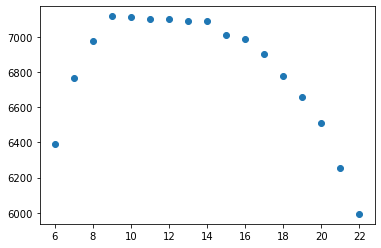

In [13]:
plt.scatter(x, y)

In [16]:
data_06_22_time = data_06_22["통행시간"]

In [17]:
data_06_22_time

0           764
1           782
2           749
3           848
4           813
          ...  
154100     3535
154104     3643
154107     1002
154108    15063
154109     3471
Name: 통행시간, Length: 115832, dtype: int64

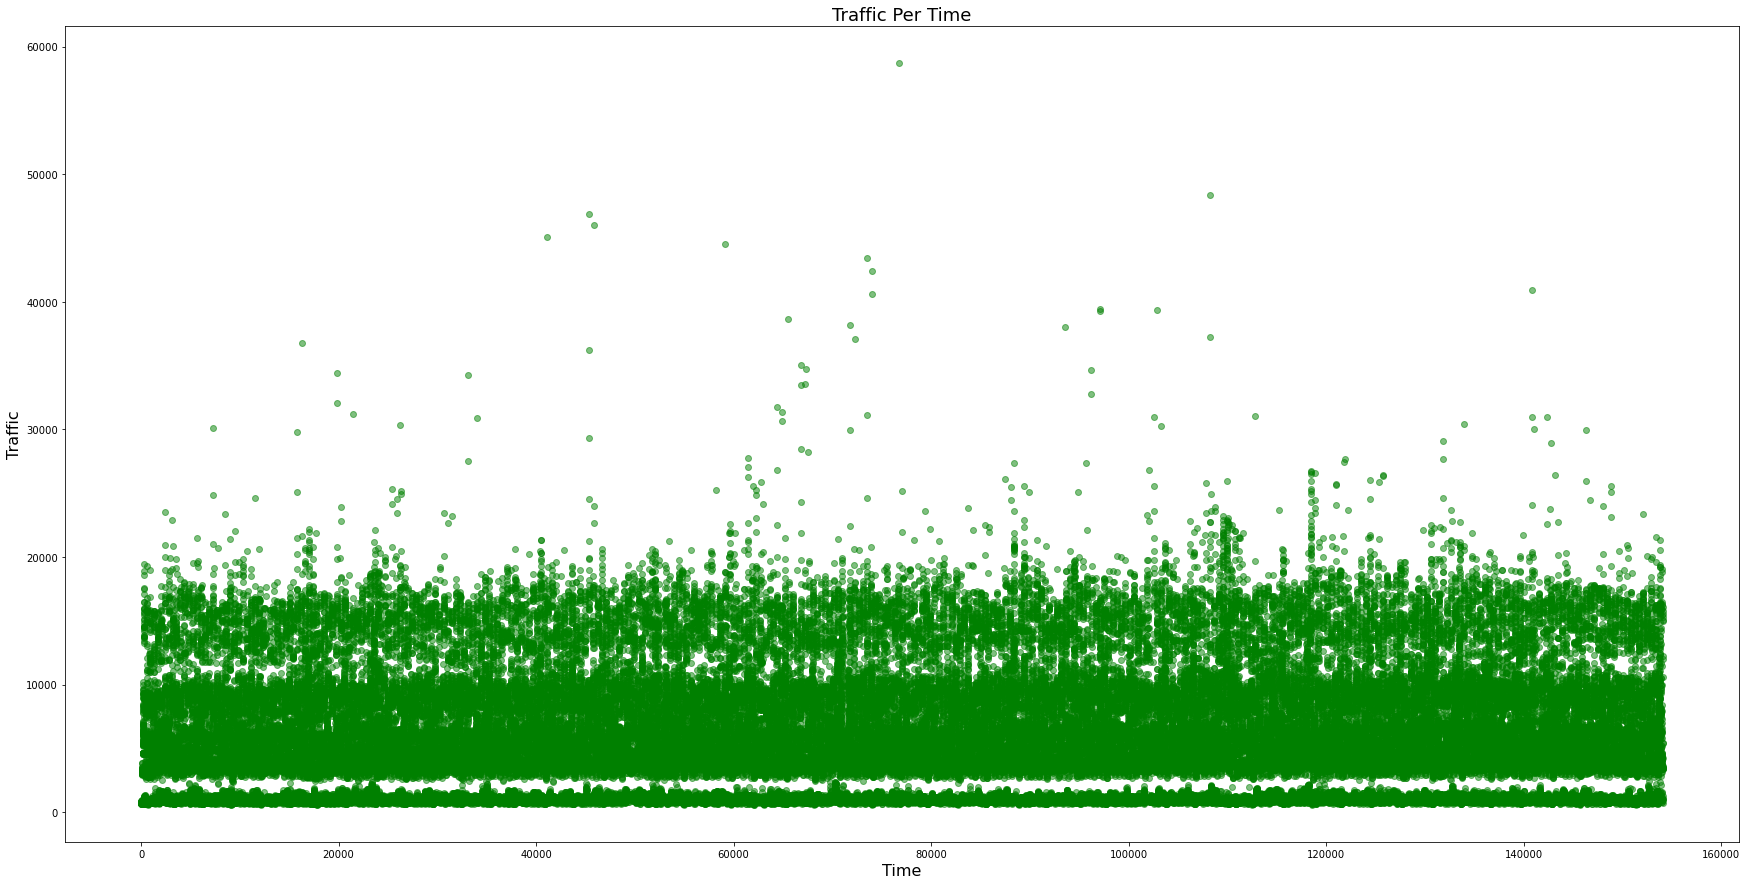

In [20]:
# Config size
plt.figure(figsize=(30,15))
plt.scatter(data_06_22_time.index, data_06_22_time.values, color="g", alpha=0.5)
plt.title("Traffic Per Time", fontsize=18)
plt.xlabel("Time", fontdict={"size":16})
plt.ylabel("Traffic", fontdict={"size":16})
plt.show()

# 4. 집계일자

In [21]:
data_days = data.groupby(by=["집계일자"]).mean()

In [22]:
data_days

,집계시,출발영업소코드,도착영업소코드,통행시간,요일
집계일자,,,,,
20210101,11.479109,101.0,115.459610,5301.888579,4.0
20210102,11.526611,101.0,114.159664,4657.389356,5.0
20210103,12.889807,101.0,114.573003,4774.823691,6.0
20210104,11.847575,101.0,113.648961,4613.133949,0.0
20210105,11.827586,101.0,113.571429,4710.795567,1.0
...,...,...,...,...,...
20211227,11.508121,101.0,114.640371,5152.218097,0.0
20211228,11.771562,101.0,114.557110,5180.466200,1.0
20211229,12.174447,101.0,113.710074,5142.501229,2.0


In [23]:
data_days_time = data_days["통행시간"]

In [24]:
data_days_time

집계일자
20210101    5301.888579
20210102    4657.389356
20210103    4774.823691
20210104    4613.133949
20210105    4710.795567
               ...     
20211227    5152.218097
20211228    5180.466200
20211229    5142.501229
20211230    4925.211401
20211231    5577.700957
Name: 통행시간, Length: 365, dtype: float64

In [26]:
x = data_days_time.index
lables = [str(i) for i in x]
print(lables)

['20210101', '20210102', '20210103', '20210104', '20210105', '20210106', '20210107', '20210108', '20210109', '20210110', '20210111', '20210112', '20210113', '20210114', '20210115', '20210116', '20210117', '20210118', '20210119', '20210120', '20210121', '20210122', '20210123', '20210124', '20210125', '20210126', '20210127', '20210128', '20210129', '20210130', '20210131', '20210201', '20210202', '20210203', '20210204', '20210205', '20210206', '20210207', '20210208', '20210209', '20210210', '20210211', '20210212', '20210213', '20210214', '20210215', '20210216', '20210217', '20210218', '20210219', '20210220', '20210221', '20210222', '20210223', '20210224', '20210225', '20210226', '20210227', '20210228', '20210301', '20210302', '20210303', '20210304', '20210305', '20210306', '20210307', '20210308', '20210309', '20210310', '20210311', '20210312', '20210313', '20210314', '20210315', '20210316', '20210317', '20210318', '20210319', '20210320', '20210321', '20210322', '20210323', '20210324', '20

In [27]:
values = data_days_time.values

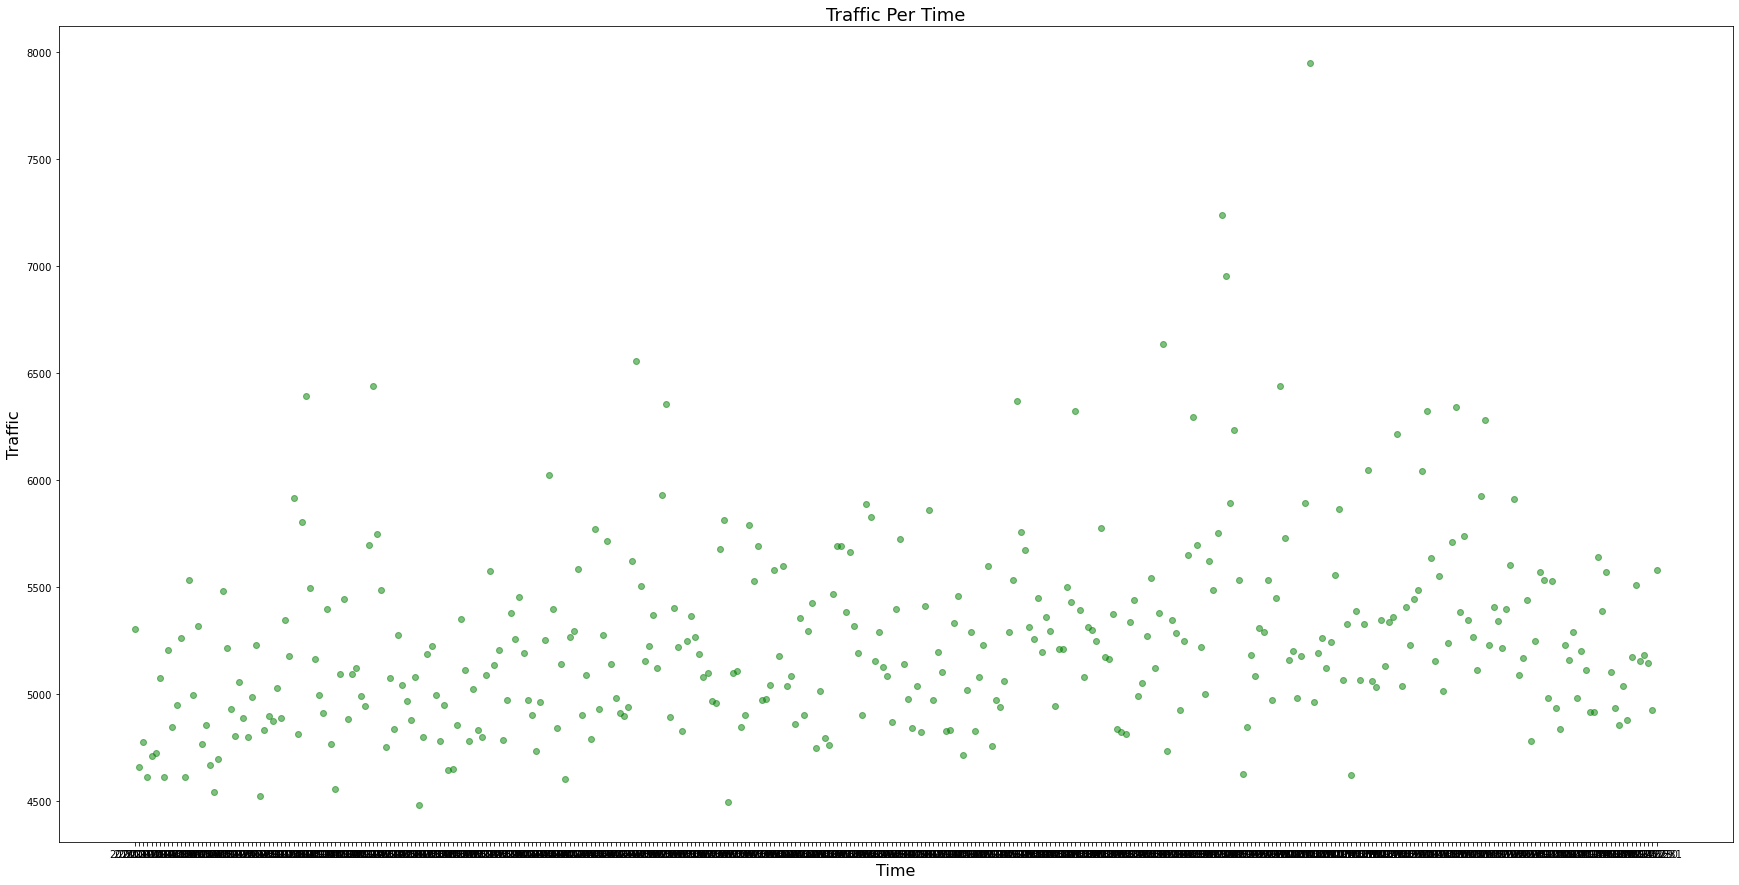

In [28]:
# Config size
plt.figure(figsize=(30,15))
plt.scatter(lables, values, color="g", alpha=0.5)
plt.title("Traffic Per Time", fontsize=18)
plt.xlabel("Time", fontdict={"size":16})
plt.ylabel("Traffic", fontdict={"size":16})
plt.show()

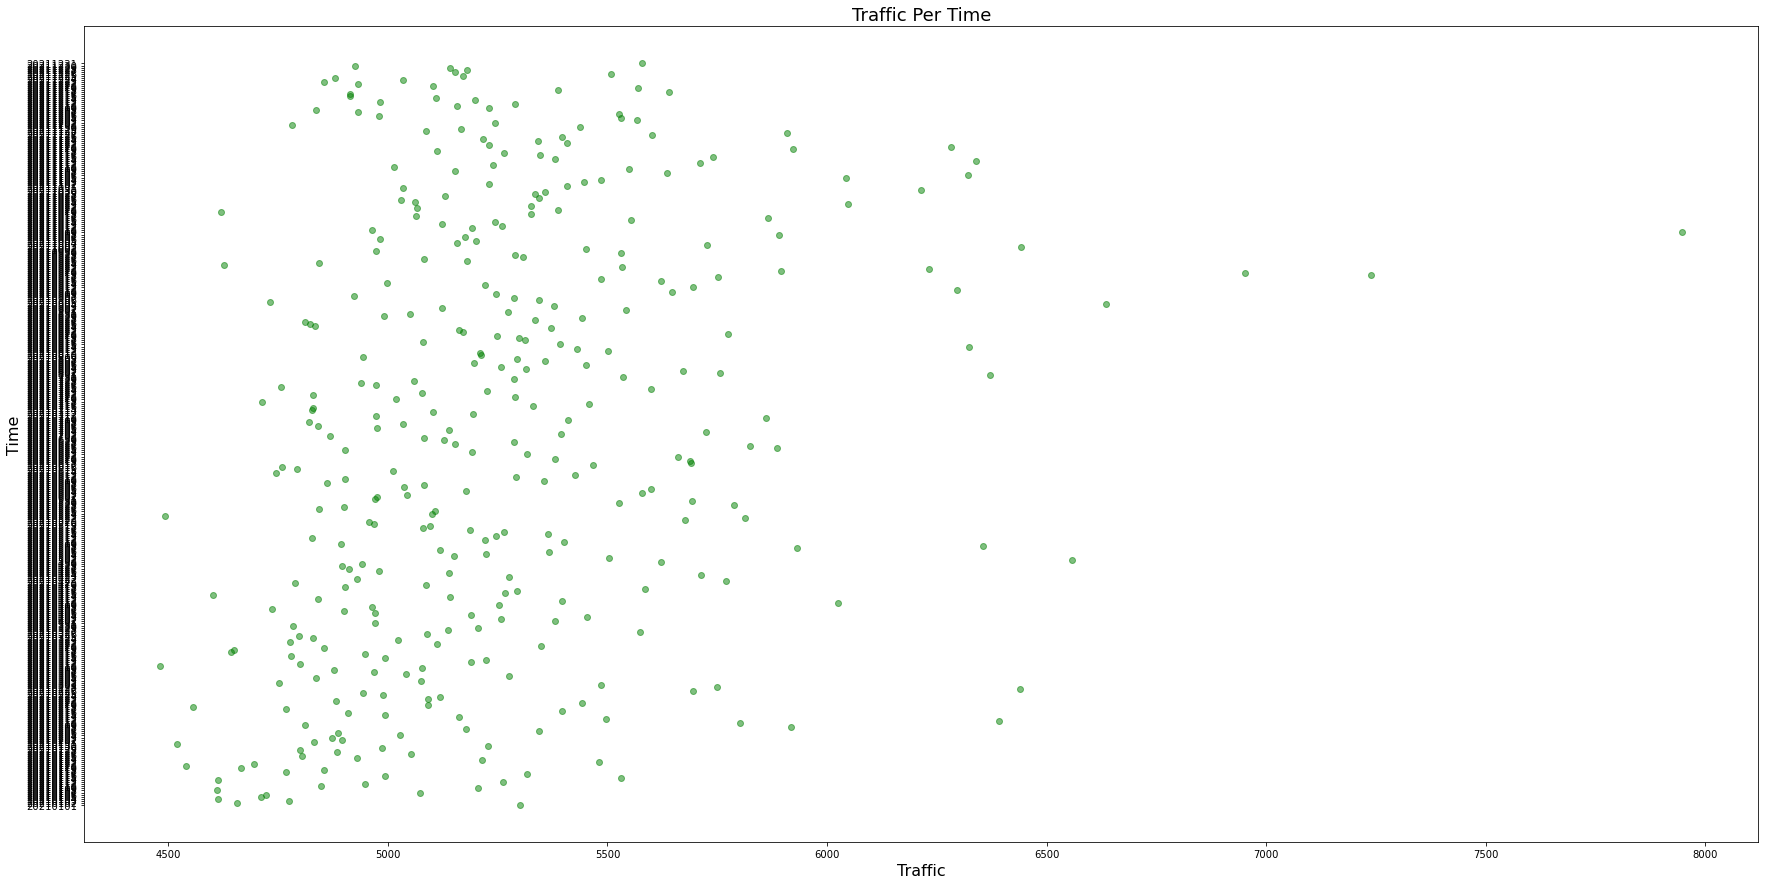

In [29]:
# Config size
plt.figure(figsize=(30,15))
plt.scatter(values , lables, color="g", alpha=0.5)
plt.title("Traffic Per Time", fontsize=18)
plt.xlabel("Traffic", fontdict={"size":16})
plt.ylabel("Time", fontdict={"size":16})
plt.show()

In [32]:
data_110_days = data[data["도착영업소코드"]==110].groupby(by=["집계일자"]).mean()
data_125_days = data[data["도착영업소코드"]==125].groupby(by=["집계일자"]).mean()
data_140_days = data[data["도착영업소코드"]==140].groupby(by=["집계일자"]).mean()


In [33]:
data_110_days_time = data_110_days["통행시간"]
data_125_days_time = data_125_days["통행시간"]
data_140_days_time = data_140_days["통행시간"]

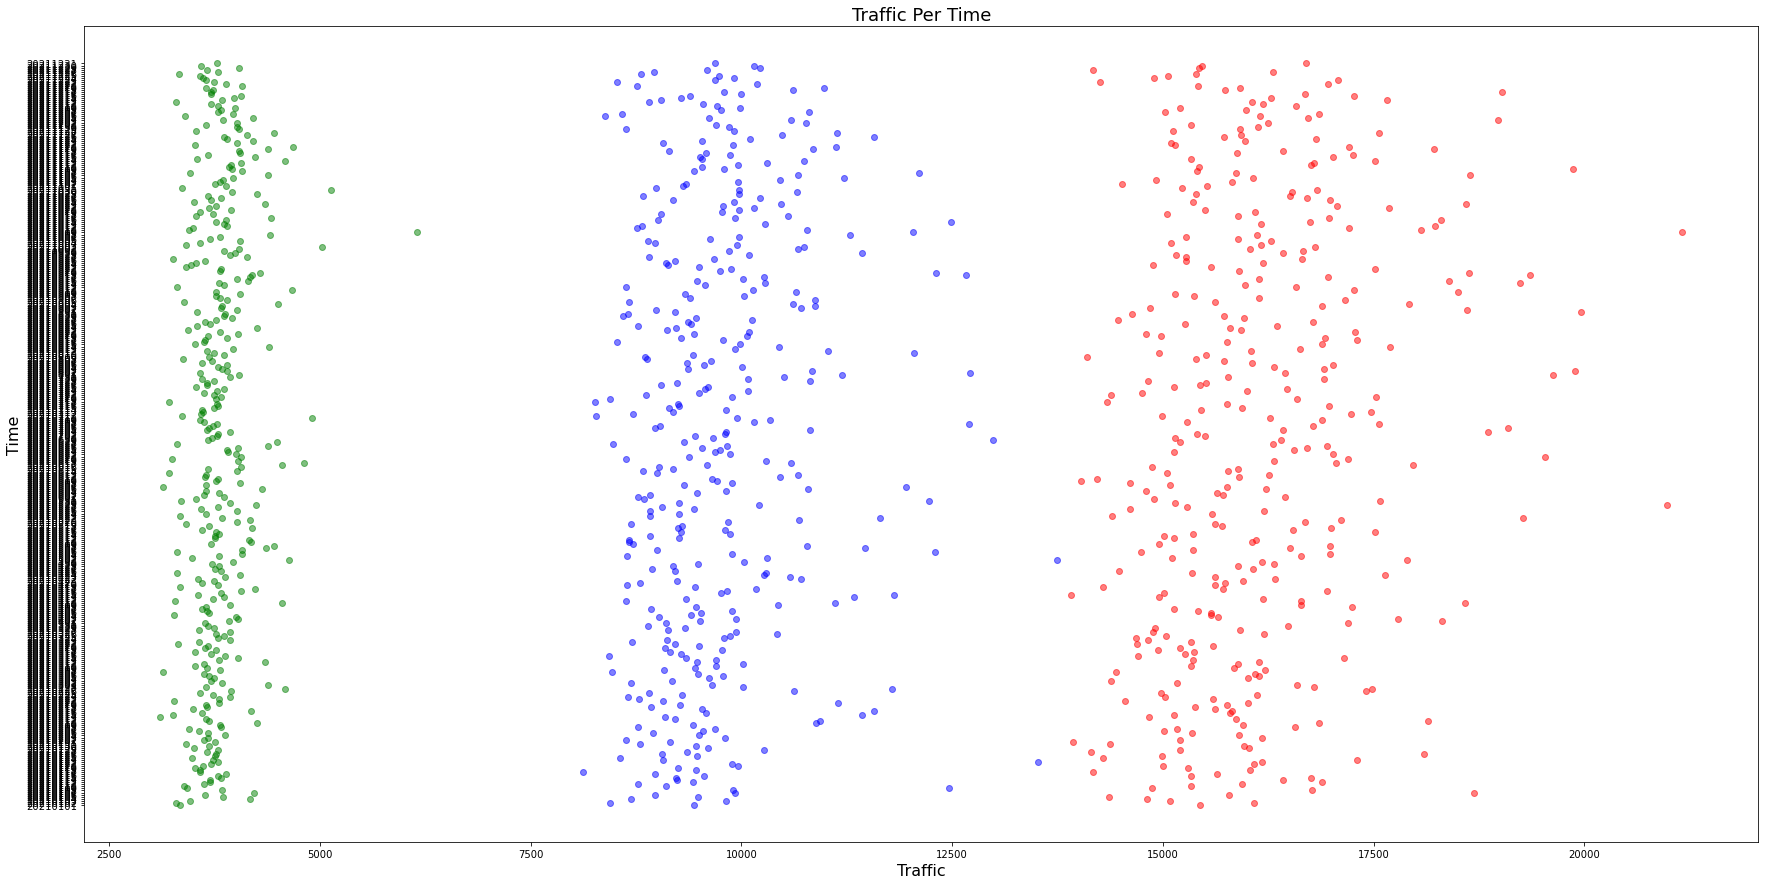

In [34]:
# Config size
plt.figure(figsize=(30,15))
plt.scatter(data_110_days_time.values , lables, color="g", alpha=0.5)
plt.scatter(data_125_days_time.values , lables, color="b", alpha=0.5)
plt.scatter(data_140_days_time.values , lables, color="r", alpha=0.5)
plt.title("Traffic Per Time", fontsize=18)
plt.xlabel("Traffic", fontdict={"size":16})
plt.ylabel("Time", fontdict={"size":16})
plt.show()